In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv("./data/processed_data.csv")

# 选择特征
feature_selected = ["温度，oC", "磁芯材料", "励磁波形", "磁芯损耗，w/m3"]
data = data[feature_selected]

# 重命名列以便于处理
data.columns = ["温度", "磁芯材料", "励磁波形", "磁芯损耗"]

# 编码分类变量
label_encoders = {}
for column in ["磁芯材料", "励磁波形"]:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# # 所有数值数据用 sklearn 的 scale 
# scaler = MinMaxScaler()
# # data[["温度", "磁芯损耗"]] = scaler.fit_transform(data[["温度", "磁芯损耗"]])
# data["磁芯损耗"] = scaler.fit_transform(data[["磁芯损耗"]])
# data["温度"] = data["温度"] / data["温度"].max()

                     sum_sq       df           F         PR(>F)
C(磁芯材料)            3.221946      3.0  107.612969   8.850409e-69
C(励磁波形)            5.997937      2.0  300.496527  3.666916e-128
C(磁芯材料):C(励磁波形)    0.935361      6.0   15.620524   5.993860e-18
温度                 0.641817      1.0   64.310050   1.158242e-15
温度:C(磁芯材料)         0.058728      3.0    1.961507   1.174250e-01
温度:C(励磁波形)         0.091534      2.0    4.585852   1.021238e-02
Residual         123.572897  12382.0         NaN            NaN
                            OLS Regression Results                            
Dep. Variable:                   磁芯损耗   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     63.34
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          7.63e-209
Time:                        21:40:02   Log-Likelihood:                 10979.
No. Observatio

In [24]:
data.head()

,温度,磁芯材料,励磁波形,磁芯损耗
0,0.277778,0,2,0.000438
1,0.277778,0,2,0.000556
2,0.277778,0,2,0.000807
3,0.277778,0,2,0.001130
4,0.277778,0,2,0.001562


In [25]:
# 预测最优条件
optimal_conditions = data[['温度', '磁芯材料', '励磁波形']].copy()
optimal_conditions['温度'] = optimal_conditions['温度'].min()
optimal_conditions['磁芯材料'] = optimal_conditions['磁芯材料'].mode()[0]
optimal_conditions['励磁波形'] = optimal_conditions['励磁波形'].mode()[0]

predicted_loss = model.predict(optimal_conditions)
print(f"在最优条件下，预测的磁芯损耗为: {predicted_loss.min()}")

在最优条件下，预测的磁芯损耗为: 0.07463311134715524


In [26]:
# 计算预测mse
predicted = model.predict(data)
print(f"预测的mse为: {((data['磁芯损耗'] - predicted) ** 2).mean()}")

预测的mse为: 0.009965556219363915


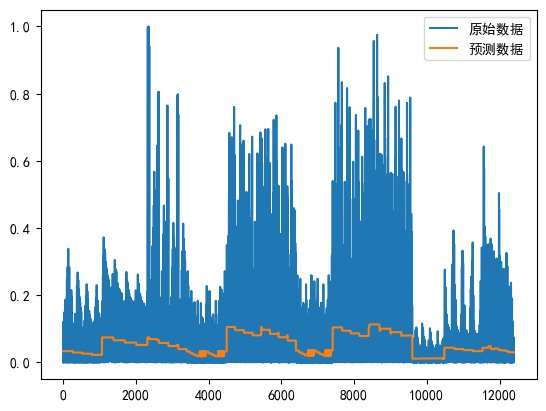

In [27]:
# 可视化预测结果和原始数据结果
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.plot(data['磁芯损耗'], label='原始数据')
plt.plot(predicted, label='预测数据')
plt.legend()
plt.show()

In [28]:
print(predicted.min(), predicted.max())

0.01134524268303938 0.11319654900550735


In [34]:
# 预测最优条件2
optimal_conditions = data[['温度', '磁芯材料', '励磁波形']].copy()
optimal_conditions['温度'] = optimal_conditions['温度'].max()
optimal_conditions['磁芯材料'] = 3
optimal_conditions['励磁波形'] = 0

predicted_loss = model.predict(optimal_conditions)
print(f"在最优条件下{optimal_conditions}，预测的磁芯损耗为: {predicted_loss.min()}")

在最优条件下        温度  磁芯材料  励磁波形
0      1.0     3     0
1      1.0     3     0
2      1.0     3     0
3      1.0     3     0
4      1.0     3     0
...    ...   ...   ...
12395  1.0     3     0
12396  1.0     3     0
12397  1.0     3     0
12398  1.0     3     0
12399  1.0     3     0

[12400 rows x 3 columns]，预测的磁芯损耗为: 0.033600929218456324


In [ ]:
# 对比预测值和实际值


In [4]:
data.head()

,温度,磁芯材料,励磁波形,磁芯损耗
0,25,0,2,1997.955250
1,25,0,2,2427.749830
2,25,0,2,3332.725760
3,25,0,2,4502.908007
4,25,0,2,6063.023248


In [13]:
feature_selected = ["温度，oC", "磁芯材料", "励磁波形", "磁芯损耗，w/m3"]
map_dict = {"磁芯材料": {"材料1": 1, "材料2": 2, "材料3": 3, "材料4": 4},
            "励磁波形": {"正弦波": 1, "三角波": 2, "梯形波": 3},
            }

data = data[feature_selected]
for key, value in map_dict.items():
    data.loc[:, key] = data.loc[:, key].map(value)

In [14]:
print(data.shape)
data.head()

(12400, 4)


,温度，oC,磁芯材料,励磁波形,磁芯损耗，w/m3
0,25,1,1,1997.955250
1,25,1,1,2427.749830
2,25,1,1,3332.725760
3,25,1,1,4502.908007
4,25,1,1,6063.023248


In [15]:
data['磁芯材料'].describe()

count     12400
unique        4
top           1
freq       3400
Name: 磁芯材料, dtype: int64

In [16]:
x = data.drop(columns=["磁芯损耗，w/m3"])
y = data["磁芯损耗，w/m3"]

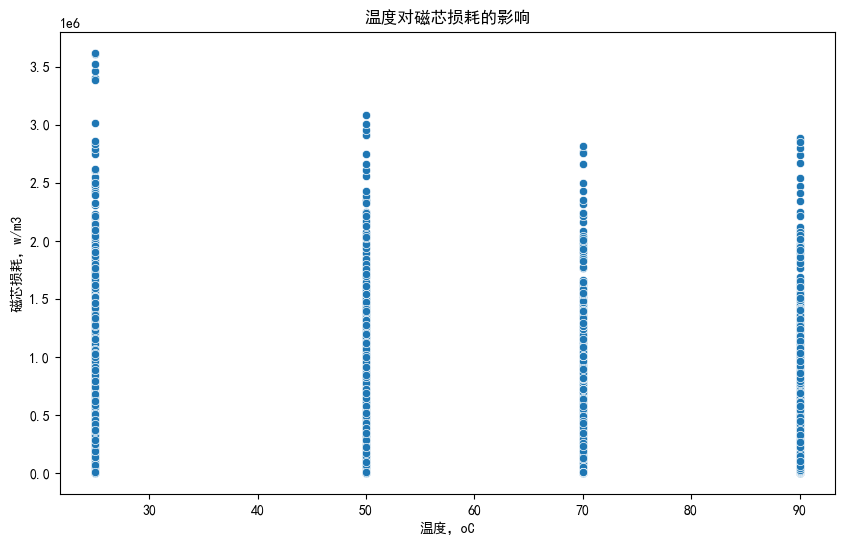

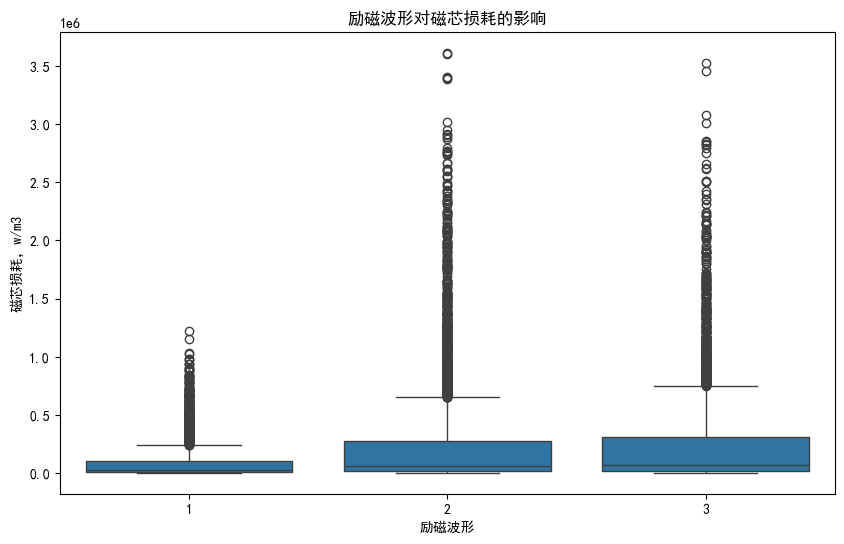

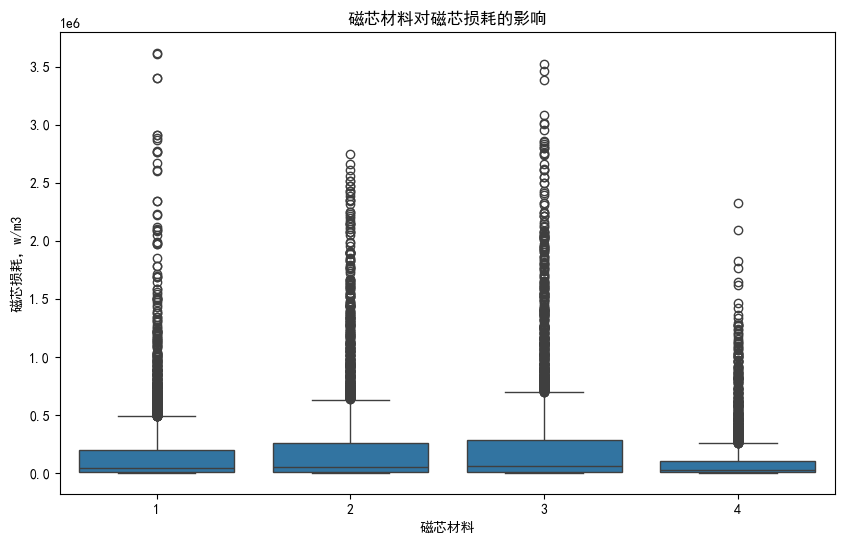

       特征          F值             P值
0   温度，oC   49.034601   2.644635e-12
1  磁芯材料_1   12.066488   5.151159e-04
2  磁芯材料_2   34.992213   3.397587e-09
3  磁芯材料_3  131.933919   2.203416e-30
4  磁芯材料_4  208.015549   8.895690e-47
5  励磁波形_1  551.042345  2.921226e-119
6  励磁波形_2  134.494500   6.150567e-31
7  励磁波形_3  133.513967   1.002553e-30


PatsyError: Error evaluating factor: NameError: name 'x2' is not defined
    y ~ C(x1) + C(x2) + C(x3) + C(x4)
                ^^^^^

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
# matplotlib 恢复默认设置
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 温度对磁芯损耗的影响
plt.figure(figsize=(10, 6))
sns.scatterplot(x='温度，oC', y='磁芯损耗，w/m3', data=data)
plt.title('温度对磁芯损耗的影响')
plt.show()

# 励磁波形对磁芯损耗的影响
plt.figure(figsize=(10, 6))
sns.boxplot(x='励磁波形', y='磁芯损耗，w/m3', data=data)
plt.title('励磁波形对磁芯损耗的影响')
plt.show()

# 磁芯材料对磁芯损耗的影响
plt.figure(figsize=(10, 6))
sns.boxplot(x='磁芯材料', y='磁芯损耗，w/m3', data=data)
plt.title('磁芯材料对磁芯损耗的影响')
plt.show()


# 检查各个特征的显著性
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(x, y)

f_reg_result = pd.DataFrame({"特征": x.columns, "F值": f_values, "P值": p_values})
print(f_reg_result)

In [32]:
# 对 x 中的 object 类型的特征进行独热编码
x = pd.get_dummies(x)

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
import numpy as np

# 假设 x 和 y 是你的特征和目标变量
# x = ...
# y = ...

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 构建随机森林回归模型并进行网格搜索
param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 最佳参数
print("最佳参数:", grid_search.best_params_)

# 使用最佳参数训练模型
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 预测
y_pred = best_model.predict(X_test)
print("均方误差:", mean_squared_error(y_test, y_pred))

# 使用交叉验证评估模型性能
cv_scores = cross_val_score(best_model, x, y, cv=5, scoring='neg_mean_squared_error')
print("交叉验证的均方误差:", -np.mean(cv_scores))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
379 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(

最佳参数: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
均方误差: 126661651983.4559
交叉验证的均方误差: 170855390055.8582


In [ ]:
# 用 autogluon 尝试回归
from autogluon.tabular import TabularPredictor


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 构建随机森林回归模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)
print("均方误差:", mean_squared_error(y_test, y_pred))

均方误差: 126661651983.4559


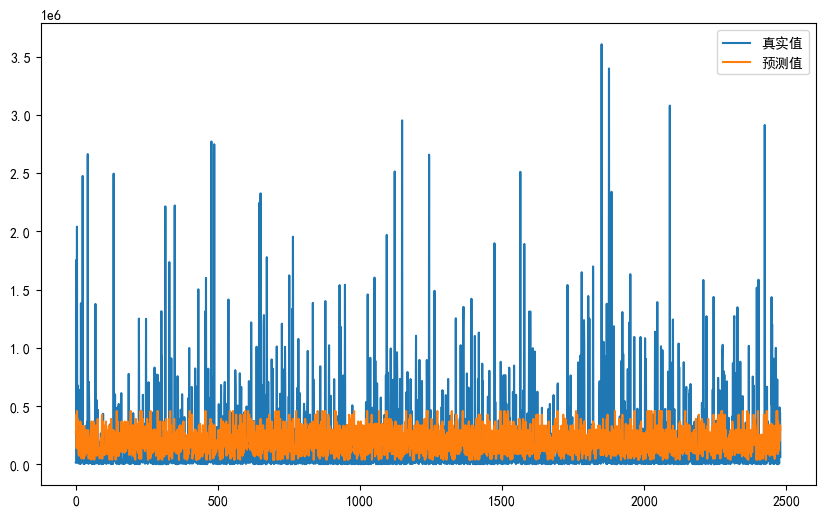

In [45]:
# 可视化对比预测值和真实值
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='真实值')
plt.plot(y_pred, label='预测值')
plt.legend()
plt.show()

In [21]:
import numpy as np

# 创建一个网格搜索最优条件
temperature_range = np.linspace(data["温度，oC"].min(), data["温度，oC"].max(), 100)
material_range = np.arange(data["磁芯材料"].nunique())
waveform_range = np.arange(data["励磁波形"].nunique())

# 初始化最小损耗和最优条件
min_loss = float('inf')
optimal_conditions = None

# 网格搜索
for temp in temperature_range:
    for material in material_range:
        for waveform in waveform_range:
            conditions = np.array([[temp, material, waveform]])
            predicted_loss = model.predict(conditions)
            if predicted_loss < min_loss:
                min_loss = predicted_loss
                optimal_conditions = conditions

print("最优条件:", optimal_conditions)
print("最小损耗:", min_loss)

c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Us

最优条件: [[60.45454545  3.          0.        ]]
最小损耗: [66751.17884982]


['正弦波' '三角波' '梯形波']


c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24358 (\N{CJK UNIFIED IDEOGRAPH-5F26}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35282 (\N{CJK UNIFIED IDEOGRAPH-89D2})

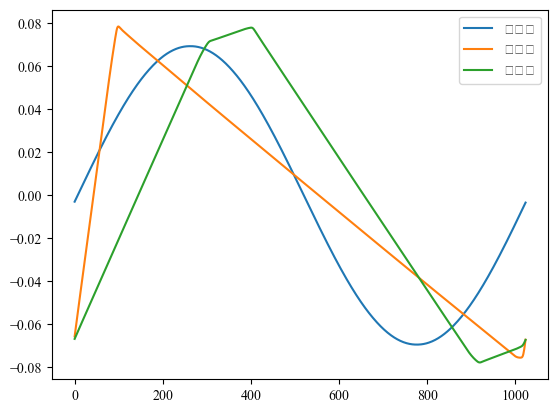

In [7]:
# 波形类别
wave_type = data['励磁波形'].unique()
print(wave_type)
# 从每个波形类别中随机选择一个波形并可视化
import matplotlib.pyplot as plt
import matplotlib
# 设置字体为 Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'
# 设置中文
matplotlib.rcParams['font.sans-serif'] = ['Songti SC']

plt.figure()
for i in wave_type:
    plt.plot(data[data['励磁波形'] == i].sample(1).values[0][4:], label=i)
plt.legend()
plt.show()


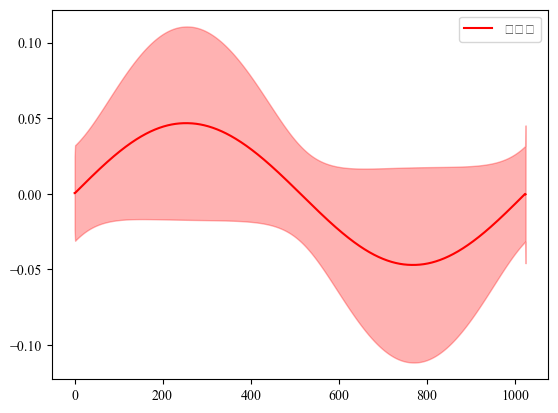

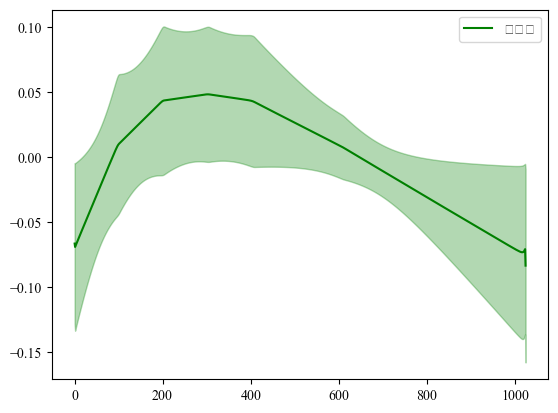

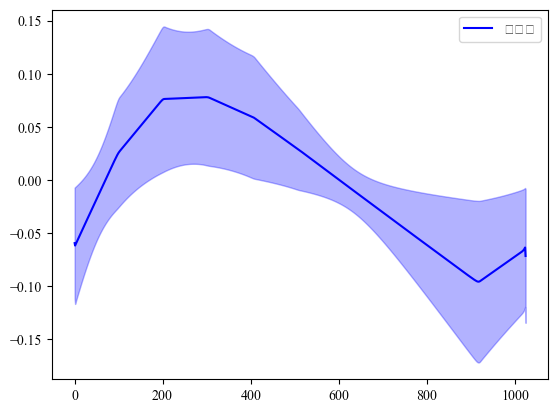

In [8]:
# 画出每个波形的平均值和标准差
plt.figure()
colors = ['r', 'g', 'b', 'y']
for i in wave_type:
    mean_values = data[data['励磁波形'] == i].iloc[:, 4:].mean().values
    std_values = data[data['励磁波形'] == i].iloc[:, 4:].std().values
    plt.plot(mean_values, color=colors[wave_type.tolist().index(i)], label=i)
    plt.fill_between(range(len(mean_values)), mean_values - std_values, mean_values + std_values, color=colors[wave_type.tolist().index(i)], alpha=0.3)
    # plt.title(i)
    plt.legend()
    plt.show()